## K-Means Algorithm
The K-means algorithm is an unsupervised learning algorithm that partitions a dataset into k clusters. It works by iteratively assigning data points to clusters and then updating the cluster centroids. A cluster centroid is a representative vector of the cluster in the statistical sense.

**Task:**
To begin with, we are given a set of data points $\{x_n\}_{n=1}^N$, $x_n \in \mathbb{R}^d$.
Our task is to group them into the given number of clusters $K$.

**Steps:**
1. **Initialize the cluster centroids:** \
   $\quad$ $\bullet$ Randomly select $K$ data points as the initial cluster centroids. \
2. **Assign data points to clusters:** \
  $\quad$ $\bullet$ For each data point, calculate the distance to each cluster centroid. \
  $\quad$ $\bullet$ Assign the data point to the cluster with
  the closest centroid.\
3. **Update the cluster centroids:** \
  $\quad$ $\bullet$ For each cluster, calculate the mean of all data points assigned to it in the previous step.\
  $\quad$ $\bullet$ Set the cluster centroid to the calculated mean.\
4. **Repeat steps 2 and 3 until convergence**: \
  $\quad$ $\bullet$ Convergence is reached when the cluster centroids no longer change or when a maximum number of iterations is reached.


## Maths Behind it

Let's translate these steps into the maths behind it. \
**Notations:** \
 $\quad$ $\bullet$ Let $C_k$ denotes the label of the $k^{th}$ cluster, $k \in \{1, 2, \dots, K\}$  \
 $\quad$ $\bullet$ Consider a binary variable
 $$r_{nk} = \begin{cases} 1, & \text{if } x_n \text{ is assigned to cluster } C_k, \\ 0, & \text{ otherwise.} \end{cases}$$

The optimization problem for K-means clustering is defined as follows.

\begin{align}
\underset{r_{nk}, \mu_k}{\text{arg min}} \sum_{k=1}^K \sum_{n=1}^{N} r_{nk}\| x_n - \mu_k \|_{2}^2 \tag{1}
\end{align}

where $\mu_k$ denotes the statistical mean of the data points belonging to the $k^{th}$ cluster also referred to as the cluster centroid.
This problem is solved in two phases for the unknowns $r_{nk}$ and $\mu_k$.

*Phase 1:*

Fix $\mu_k$'s for all $k$ and determine $r_{nk}$ for each $n$ as follows.
\begin{align}
 r_{nk^*} = \begin{cases} 1, & k^* = \underset{j}{\text{arg min }} \|x_n - \mu_j\|^2, j = 1, 2, \dots, K \\ 0, & \text{ otherwise.} \end{cases}
 \end{align}
This phase translates to Step 2 above in the theory part that is the values of $r_{nk}$ representing the cluster assignment are obtained by computing the minimum distance of each of the data points to the cluster centroids (the centroids $\mu_k$'s are initialized to randomly chosen data points).  

*Phase 2:*

Fix $r_{nk}$'s obtained in Phase 1 and optimize for $\mu_k$. This requires taking the derivative of Eq. (1) with respect to $\mu_j$ and equating it to zero which gives

\begin{align}
\mu_j^* = \frac{\sum_n r_{nj}x_n}{\sum_n r_{nj}},~ j=1,2,\dots, K.
\end{align}

This translates to Step 3 above. We just computed the mean of the data points which were closest to a particular centroid. This mean value $\mu_j^*$ represents the updated cluster centroid. Step 4 from the previous section translates to repeating Phase 1 and Phase 2 until convergence. The full algorithm is described as follows.

### **Algorithm:**
1. Initialize $\mu_k$'s for each value $k$ by randomly choosing $K$ data points.
2. Calculate $r_{nk}$'s holding $\mu_k$'s fixed
3. Calculate $\mu_k$'s holding $r_{nk}$'s fixed
4. Repeat 2 and 3 until convergence that is $\|\mu_k^{(t+1)} - \mu_k^{(t)}\| \approx 0~\forall k$ where $t$ denotes the iteration number.
5. Output: $\{\mu_k^*\}_{k=1}^K$ and $\{r_{nk}^*\}_{k=1}^K$.

It should be noted that the algorithm requires prior knowledge of $K$.
In practice, this is unknown for a given dataset. There are several methods proposed in the literature to get an estimate of the number of clusters from a given dataset (Please refer or ask ChatGPT &#128522;!).

That's all for this algorithm &#128522;!
The next section provides a Python code for it.

## Python Code for K-Means Algorithm

In [4]:
# @title
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0) # X: N x d where N = 300, d = 2
min_x, max_x = min(X[:,0]), max(X[:,0])
min_y, max_y = min(X[:,1]), max(X[:,1])
# Note: you can play with cluster_std to create either well separated clusters or overlapping ones

In [5]:
# @title
def k_means_clustering(X, K, mu):
  """ X: N x d
      K: number of clusters
      mu: K x d
  """
  flag = False
  D = []
  updated_mu = mu.copy() # make a copy of current centroid
  # Phase 1: fix mu and find rnk
  for k in range(K):
    # compute distance of each of the data points from cluster centriods
    D += [np.sum((X - mu[k,:])**2, axis = -1)] # each member list has a shape of (K,)
    # find index of the closest centroid to each of the data point
    closest_cluster = np.argmin(D, axis = 0) # cluster_class can take any value from [0, K-1]
    rnk = np.eye(K)[closest_cluster] # construct one-hot -> rnk: n x k

  # Phase 2: for fix rnk update mu
  for k in range(K):
    data_k = X[rnk[:, k].astype(bool), :]
    if data_k.size != 0:
      updated_mu[k, :] = np.sum(data_k, axis=0) / np.sum(rnk[:, k], axis=0)
    else:
      updated_mu[k,:] = mu[k, :]
  # criterion
  if np.sum((mu - updated_mu)**2) <= np.finfo(float).eps:
    print("Convergence criterion met, exiting!")
    flag = True
    return rnk, updated_mu, flag
  return rnk, updated_mu, flag

K = 3
max_itr = 10
# initialize cluster centroids randomly from the given data points
idx_K = np.random.randint(0, X.shape[0], K)
mu = X[idx_K, :]
initial_mu = mu.copy()
for i in range(max_itr):
  rnk, mu, flag = k_means_clustering(X, K, mu)
  if flag:
    break
if i == max_itr - 1:
  print('Mximum iterations reached!')

Convergence criterion met, exiting!


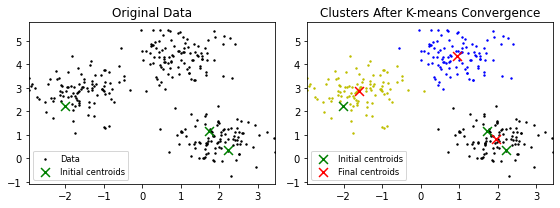

In [6]:
# @title
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].scatter(X[:, 0], X[:, 1], s=2, color='black', label="Data")
axs[0].scatter(initial_mu[:, 0], initial_mu[:, 1], s=80, color='g', marker='x', label="Initial centroids", linewidths=2)
axs[0].legend(fontsize='small')
axs[0].set_title("Original Data")
axs[0].set_xlim(min_x, max_x)
c = ['black', 'blue', 'y']
k = np.arange(K)
for i, k in zip(c, k):
  axs[1].scatter(X[rnk[:, k].astype(bool), 0], X[rnk[:,k].astype(bool), 1], color=i, s=2)
axs[1].scatter(initial_mu[:, 0], initial_mu[:, 1], s=80, color='g', marker='x', label="Initial centroids", linewidths=2)
axs[1].scatter(mu[:, 0], mu[:, 1], s=80, color='red', marker='x', label='Final centroids', linewidths=2)
axs[1].legend(fontsize='small')
axs[1].set_title("Clusters After K-means Convergence")
axs[1].set_xlim(min_x, max_x)
plt.tight_layout()
